In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
covid=pd.read_csv("C:\\Users\\AVIRAJ\\Downloads\\patients_data.csv")
covid.head()

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
0,1,P1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Travelled from Wuhan,Student from Wuhan
1,2,P2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Travelled from Wuhan,Student from Wuhan
2,3,P3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Travelled from Wuhan,Student from Wuhan
3,4,P4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,Imported,NaN,15/03/2020,Recovered,NaN,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,"Travelled from Austria, Italy",Travel history to Italy and Austria
4,5,P5,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,...,Imported,NaN,02/03/2020,Recovered,NaN,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travelled from Dubai to Bangalore on 20th Feb,...","Travel history to Dubai, Singapore contact"


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27890 entries, 0 to 27889
Data columns (total 21 columns):
patient_number                             27890 non-null int64
p_id                                       27890 non-null object
state_patient_number                       2997 non-null object
date_announced                             27890 non-null object
age_bracket                                2346 non-null object
gender                                     5313 non-null object
detected_city                              2347 non-null object
detected_district                          20246 non-null object
detected_state                             27890 non-null object
state_code                                 27890 non-null object
nationality                                2707 non-null object
type_of_transmission                       2990 non-null object
contracted_from_which_patient_suspected    1563 non-null object
status_change_date                         27780 non-n

In [4]:
covid.tail()

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
27885,27794,P27794,NaN,26/04/2020,NaN,NaN,NaN,NaN,Delhi,DL,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/ANI/status/125445350902774...,NaN,NaN,Details awaited,NaN
27886,27794,P27794,NaN,26/04/2020,NaN,NaN,NaN,NaN,Uttarakhand,UT,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://t.me/indiacovid/3303,NaN,NaN,Details awaited,NaN
27887,27794,P27794,NaN,26/04/2020,12,F,NaN,Munger,Bihar,BR,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/sanjayjavin/status/1254467...,NaN,NaN,NaN,NaN
27888,27794,P27794,NaN,26/04/2020,13,F,NaN,Munger,Bihar,BR,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/sanjayjavin/status/1254467...,NaN,NaN,NaN,NaN
27889,27794,P27794,NaN,26/04/2020,17,F,NaN,Munger,Bihar,BR,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/sanjayjavin/status/1254467...,NaN,NaN,NaN,NaN


In [6]:
covid['detected_state'].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya'], dtype=object)

In [8]:
wb=covid[covid['detected_state']=='West Bengal']
wb

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
143,144,P144,NaN,17/03/2020,18,M,Kolkata,Kolkata,West Bengal,WB,...,Imported,NaN,17/03/2020,Recovered,NaN,https://twitter.com/PTI_News/status/1239951825...,https://twitter.com/ANI/status/123995338824826...,https://docs.google.com/spreadsheets/u/2/d/e/2...,Travelled from United Kingdom (quarantined),Travel history to United Kingdom (quarantined)
198,200,P200,NaN,20/03/2020,22,M,Beleghata,Kolkata,West Bengal,WB,...,Imported,NaN,20/03/2020,Hospitalized,NaN,https://twitter.com/ANI/status/124089803707494...,NaN,NaN,Travelled to UK,Travelled to UK
258,259,P259,NaN,21/03/2020,23,F,Habra,North 24 Parganas,West Bengal,WB,...,Imported,NaN,21/03/2020,Recovered,NaN,https://twitter.com/PTI_News/status/1241210183...,https://twitter.com/ANI/status/124129959103668...,https://docs.google.com/spreadsheets/u/2/d/e/2...,Travelled from UK via Mumbai,Returned from Scotland via Mumbai
326,327,P327,WB-P4,21/03/2020,57,M,Dum Dum,Kolkata,West Bengal,WB,...,Local,NaN,23/03/2020,Deceased,NaN,https://twitter.com/PTI_News/status/1241377636...,https://economictimes.indiatimes.com/news/poli...,https://timesofindia.indiatimes.com/city/kolka...,"No international travel history, has travelled...",No international travel history but Travelled ...
390,391,P391,NaN,22/03/2020,48,M,Kolkata,Kolkata,West Bengal,WB,...,Local,P200,22/03/2020,Recovered,NaN,https://twitter.com/abpanandatv/status/1241737...,https://twitter.com/TimesNow/status/1241735783...,NaN,Father of P200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26379,26381,P26381,NaN,26/04/2020,NaN,NaN,NaN,NaN,West Bengal,WB,...,NaN,NaN,26/04/2020,Hospitalized,NaN,mohfw.gov.in,NaN,NaN,Details awaited,NaN
26380,26382,P26382,NaN,26/04/2020,NaN,NaN,NaN,NaN,West Bengal,WB,...,NaN,NaN,26/04/2020,Hospitalized,NaN,mohfw.gov.in,NaN,NaN,Details awaited,NaN
26381,26383,P26383,NaN,26/04/2020,NaN,NaN,NaN,NaN,West Bengal,WB,...,NaN,NaN,26/04/2020,Hospitalized,NaN,mohfw.gov.in,NaN,NaN,Details awaited,NaN
26382,26384,P26384,NaN,26/04/2020,NaN,NaN,NaN,NaN,West Bengal,WB,...,NaN,NaN,26/04/2020,Hospitalized,NaN,mohfw.gov.in,NaN,NaN,Details awaited,NaN


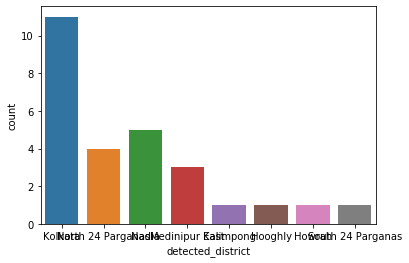

In [10]:
sns.countplot(x='detected_district',data=wb)

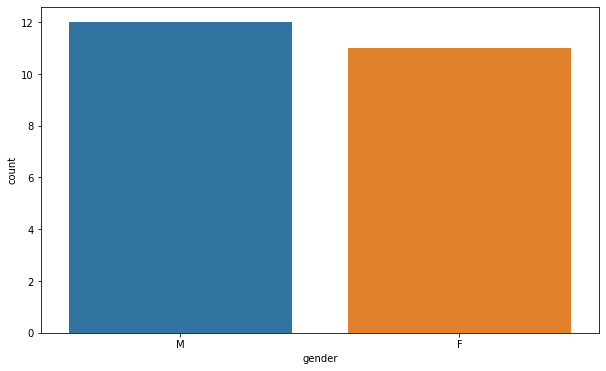

In [15]:
f,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='gender',data=wb)

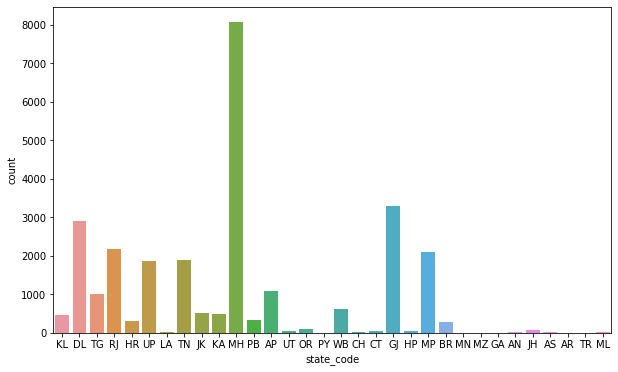

In [13]:
f,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='state_code',data=covid)

In [28]:
f=covid['notes'].value_counts()
f.sort_values(ascending=False)[0:10]

Details awaited                    23177
Travelled to Delhi                   863
Details Awaited                      377
Travelled from Dubai                  99
Local Transmission                    92
Contact of Positive case              53
Contact transmission                  29
SARI                                  27
Have identified contact history       26
Travelled from UK                     26
Name: notes, dtype: int64

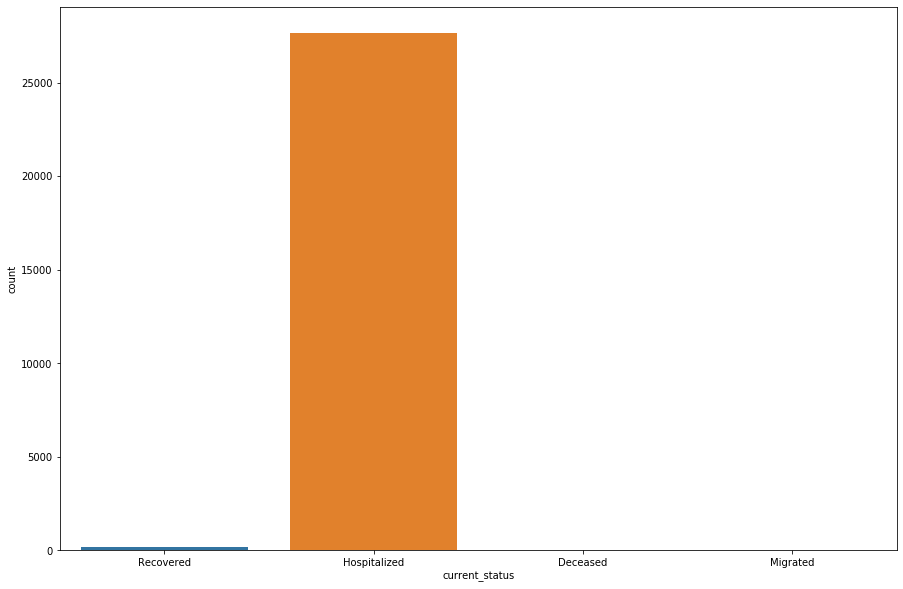

In [17]:
f,ax=plt.subplots(figsize=(15,10))
sns.countplot(x='current_status',data=covid)

In [24]:
covid[covid['current_status']=='Deceased']

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
72,72,P72,DL-P6,12/03/2020,69,F,Janakpuri,South West Delhi,Delhi,DL,...,Local,P64,12/03/2020,Deceased,NaN,https://www.newindianexpress.com/cities/delhi/...,NaN,NaN,Mother of P64,Mother of P64
76,77,P77,NaN,12/03/2020,65,M,Mumbai,Mumbai,Maharashtra,MH,...,Imported,NaN,12/03/2020,Deceased,NaN,https://www.ndtv.com/india-news/coronavirus-ou...,https://www.thehindu.com/news/national/other-s...,https://www.theweek.in/news/india/2020/03/17/c...,"Travelled from Dubai on March 8, Third death i...","Third death in India, Returned from Dubai on M..."
81,74,P74,KA-P6,13/03/2020,76,M,Kalaburagi,Kalaburagi,Karnataka,KA,...,Imported,NaN,13/03/2020,Deceased,NaN,https://www.hindustantimes.com/india-news/indi...,https://www.indiatoday.in/india/story/tracking...,NaN,"Travelled from Saudi on Feb 29, First death in...","First death in India, Returned from Saudi on F..."
181,182,P182,PJ-P2,19/03/2020,70,M,Banga,Shahid Bhagat Singh Nagar,Punjab,PB,...,Imported,NaN,19/03/2020,Deceased,NaN,https://www.indiatoday.in/india/story/coronavi...,https://www.latestly.com/india/news/baldev-sin...,https://punjabupdate.com/media-bulletin-21-03-...,Travelled from Germany via Italy,Arrived from Germany via Italy
269,270,P270,NaN,21/03/2020,63,M,Mumbai,Mumbai,Maharashtra,MH,...,Imported,NaN,22/03/2020,Deceased,NaN,https://twitter.com/PTI_News/status/1241219494...,https://www.thehindu.com/news/cities/mumbai/fi...,https://english.jagran.com/india/coronavirus-p...,"Travelled from UK, had a chronic history of di...","Travel history to UK, had a chronic history of..."
293,294,P294,NaN,21/03/2020,67,M,Surat,Surat,Gujarat,GJ,...,Local,NaN,22/03/2020,Deceased,NaN,https://twitter.com/ANI/status/124129257358444...,https://www.thehindu.com/news/national/coronav...,https://economictimes.indiatimes.com/news/poli...,Travelled to Delhi & Jaipur,Details awaited
326,327,P327,WB-P4,21/03/2020,57,M,Dum Dum,Kolkata,West Bengal,WB,...,Local,NaN,23/03/2020,Deceased,NaN,https://twitter.com/PTI_News/status/1241377636...,https://economictimes.indiatimes.com/news/poli...,https://timesofindia.indiatimes.com/city/kolka...,"No international travel history, has travelled...",No international travel history but Travelled ...
347,348,P348,NaN,22/03/2020,38,M,Munger,Munger,Bihar,BR,...,Imported,NaN,22/03/2020,Deceased,NaN,https://twitter.com/ANI/status/124161324593426...,https://twitter.com/ANI/status/124162195892553...,NaN,"Travelled from Qatar, Kolkata. He was from Mun...",He was from Munger. He died yesterday at AIIMS...
379,380,P380,NaN,22/03/2020,69,M,,Ernakulam,Kerala,KL,...,Imported,NaN,28/03/2020,Deceased,NaN,https://english.manoramaonline.com/news/kerala...,https://www.facebook.com/233008147097016/posts...,https://www.facebook.com/dcekm/posts/969574620...,Travelled from Dubai,NaN
430,430,P430,NaN,23/03/2020,85,F,Ahmedabad,Ahmadabad,Gujarat,GJ,...,Imported,NaN,25/03/2020,Deceased,NaN,https://twitter.com/PTI_News/status/1241956921...,https://twitter.com/MoHFW_GUJARAT/status/12428...,NaN,Travelled from Saudi Arabia. She was suffering...,NaN


In [25]:
covid['current_status'].value_counts()

Hospitalized    27662
Recovered         181
Deceased           46
Migrated            1
Name: current_status, dtype: int64

In [30]:
covid[covid['notes']=='Travelled from Wuhan']

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
0,1,P1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Travelled from Wuhan,Student from Wuhan
1,2,P2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Travelled from Wuhan,Student from Wuhan
2,3,P3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Travelled from Wuhan,Student from Wuhan


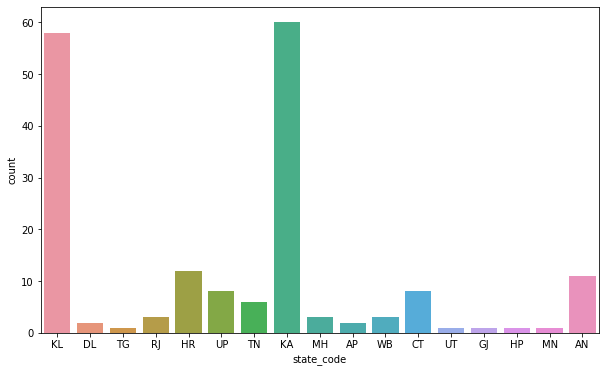

In [31]:
recover=covid[covid['current_status']=='Recovered']
f,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='state_code',data=recover)

In [43]:
mp=covid[covid['state_code']=='MP']
mp

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
246,248,P248,NaN,20/03/2020,59,M,Jabalpur,Jabalpur,Madhya Pradesh,MP,...,Imported,NaN,20/03/2020,Hospitalized,NaN,https://twitter.com/PTI_News/status/1241022270...,https://www.naidunia.com/madhya-pradesh/jabalp...,NaN,Travelled from Dubai and Thailand(Family),Travel history to Dubai and Thailand(Family)
247,249,P249,NaN,20/03/2020,45,F,Jabalpur,Jabalpur,Madhya Pradesh,MP,...,Imported,P248,20/03/2020,Hospitalized,NaN,https://twitter.com/PTI_News/status/1241022270...,https://www.naidunia.com/madhya-pradesh/jabalp...,NaN,Travelled from Dubai and Thailand(Family),Travel history to Dubai and Thailand(Family)
248,250,P250,NaN,20/03/2020,22,F,Jabalpur,Jabalpur,Madhya Pradesh,MP,...,Imported,P248,20/03/2020,Hospitalized,NaN,https://twitter.com/PTI_News/status/1241022270...,https://www.naidunia.com/madhya-pradesh/jabalp...,NaN,Travelled from Dubai and Thailand(Family),Travel history to Dubai and Thailand(Family)
249,251,P251,NaN,20/03/2020,24,M,Jabalpur,Jabalpur,Madhya Pradesh,MP,...,Imported,NaN,20/03/2020,Hospitalized,NaN,https://twitter.com/PTI_News/status/1241022270...,https://www.naidunia.com/madhya-pradesh/jabalp...,NaN,Travelled from Germany and Switzerland,"Travel history to Germany and Switzerland, civ..."
361,362,P362,NaN,22/03/2020,26,F,Bhopal,Bhopal,Madhya Pradesh,MP,...,Imported,NaN,22/03/2020,Hospitalized,NaN,https://dbpost.com/madhya-pradesh-first-corona...,https://timesofindia.indiatimes.com/city/bhopa...,NaN,Travelled from UK via Delhi (by Shatabdi Express),Professor Colony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26733,26735,P26735,NaN,26/04/2020,NaN,NaN,NaN,Dewas,Madhya Pradesh,MP,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/JansamparkMP/status/125438...,NaN,NaN,Details awaited,NaN
26734,26736,P26736,NaN,26/04/2020,NaN,NaN,NaN,Ratlam,Madhya Pradesh,MP,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/JansamparkMP/status/125438...,NaN,NaN,Details awaited,NaN
26735,26737,P26737,NaN,26/04/2020,NaN,NaN,NaN,Mandsaur,Madhya Pradesh,MP,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/JansamparkMP/status/125438...,NaN,NaN,Details awaited,NaN
26736,26738,P26738,NaN,26/04/2020,NaN,NaN,NaN,Dindori,Madhya Pradesh,MP,...,NaN,NaN,26/04/2020,Hospitalized,NaN,https://twitter.com/JansamparkMP/status/125438...,NaN,NaN,Details awaited,NaN
